<a href="https://colab.research.google.com/github/DaltonWise/Homework/blob/main/Final_exam_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

For each of the data sets I downloaded them from R studio from the data generating code we were given. After doing the modeling for the 1000 observation data set I copied my code and used it on the 10,000 observation data set and so on. I did not change or add many comments after the first set of code due to this.

In [94]:
#Downloading each of the data sets

dfdata1000 = pd.read_csv("//content//dfdata1000.csv")

dfdata10000 = pd.read_csv("//content//dfdata10000.csv")

dfdata100000 = pd.read_csv("//content//dfdata100000.csv")

#/content/dfdata1000.csv

I dont think anything needs to be done to the data. It is generated and seems to not have any missing values. I checked the data types and they done seem to need to be changed.

In [95]:
dfdata1000.describe()

,X1,X2,X3,X4,Y
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,118.266723,113.731754,8.120000,14452.900638,1.255444e+07
std,24.342526,28.549243,1.257543,8810.104499,1.185813e+07
min,52.508381,52.697641,5.000000,-1963.572599,8.319586e+05
25%,102.849797,91.046641,7.000000,6768.485870,4.624211e+06
50%,118.338004,110.206715,8.000000,15275.903940,8.910221e+06
75%,133.029199,128.816044,9.000000,22649.036361,1.500317e+07
max,179.763237,203.944793,10.000000,29880.740687,7.131952e+07


In [96]:
type(dfdata1000)

dfdata1000.dtypes

,0
X1,float64
X2,float64
X3,int64
X4,float64
Y,float64


In [97]:
!pip install scikeras

In [123]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np
import time

For the two glm models that I am doing first I decided to do ridge and lasso regression because I the outcome variable y is a continuous variable seemingly.

In [99]:
# Separate the out come variable from the prediictors
#all predictor variables excluding y
X = dfdata1000.drop(columns='Y')
#the outcome variable y
Y = dfdata1000['Y']

#separating the data set into two sets, the training and the holdout sets.
#the training set is 80% of the data set. The holdout is 20%.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)



In [100]:
#here we scale the features. We do this because there is a large range in the size of variables.
#some of the x values are much larger than others.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
# Here we define our two models.
#They are both using y as the outcome and work on continuous variables.
model1 = Ridge(alpha=1.0)
model2 = Lasso(alpha=0.1)

In [102]:
#Ridge: model 1
#Cross validation score location:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
#setting up the timer
start = time.time()
#gettign cross validation scores based on model 1. using 5 folds for cv.
cv_scores_ridge = cross_val_score(model1, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
cv = np.mean(cv_scores_ridge)

#fitting the model
model1.fit(X_train_scaled, Y_train)
end = time.time()
time1 = end - start

# Predict on hold-out set
#using model 1 to make prediction
Y_pred1 = model1.predict(X_test_scaled)
#Getting the mean squared error for the difference between the two.
mse1 = mean_squared_error(Y_test, Y_pred1)

print(time1)
print(mse1)
print(cv)
print(cv/time1)


0.08777666091918945
42997602569142.945
-11914271400738.896
-135733932869782.2


In [103]:
# Model 2: Lasso
start_2 = time.time()
cv_scores_lasso = cross_val_score(model2, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
model2.fit(X_train_scaled, Y_train)
end_2 = time.time()
cv = np.mean(cv_scores_lasso)

time2 = end_2 - start_2
print(time2)

# Prediction on the hold-out set
Y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(Y_test, Y_pred2)

print(mse2)
print(cv)
print(cv/time2)


0.029732704162597656
41606837392262.4
-11880306318490.988
-399570326786349.1


The first two xgboost models. We are going to use the same values we did for the x trained, y train etc as before since we are still using scikit.

In [48]:
#Setting up the two xgb models this time using different hyper parameters.
#I wanted to use something with the same interface as the prior models so I used the xgb.XGBRegressor() function.
#I got info about it here: https://xgboost.readthedocs.io/en/latest/python/sklearn_estimator.html#obtaining-the-native-booster-object

xgb1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)

In [104]:
#xgb1
start1 = time.time()
cv_xgb1 = cross_val_score(model1, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_xgb1 = np.mean(cv_xgb1)
model1.fit(X_train_scaled, Y_train)
end1 = time.time()

y_pred1 = model1.predict(X_test_scaled)
mseXGB1 = mean_squared_error(Y_test, Y_pred1)

timeXGB1 = end1 - start1
print(timeXGB1)
print(mseXGB1)
print(cv_xgb1)
print(cv_xgb1/timeXGB1)

0.040370941162109375
42997602569142.945
-11914271400738.896
-295119981297864.25


In [105]:
#xgb2
start2 = time.time()
cv_xgb2 = cross_val_score(model2, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_xgb2 = np.mean(cv_xgb2)
xgb2.fit(X_train_scaled, Y_train)
end2 = time.time()

Y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(Y_test, Y_pred2)
time2 = end2 - start2
print(time2)
print(mse2)
print(cv_xgb2)
print(cv_xgb2/time2)

1.2043671607971191
41606837392262.4
-11880306318490.988
-9864355908399.164


The first two deep learning networks. These are using a similar format to make it easier.

In [106]:
# Building the model
#picking activation sequence
#https://www.geeksforgeeks.org/choosing-the-right-activation-function-for-your-neural-network/
#I used code fron the week 14 asignment for this

#getting the training accuracy and validation accuracy
#how to get the accuracy from the model easily
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# Convert to NumPy arrays for Keras
X_train_np = np.array(X_train_scaled)
X_test_np = np.array(X_test_scaled)
Y_train_np = np.array(Y_train)
Y_test_np = np.array(Y_test)

#create model
dl_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dense(1)
])

# Compile the model
#I chose these based on the classification example in the learning materials. I couldnt get it to run until I changed how "adam" was included
dl_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

start_time = time.time()

# Train the model
dl_model.trained = dl_model.fit(X_train_np, Y_train_np, epochs=50, batch_size = 32, verbose=0)
end = time.time()
elapsed_time = end - start_time

Y_train_pred = dl_model.predict(X_train_np).flatten()
train_mse = mean_squared_error(Y_train_np, Y_train_pred)

# Predict on hold-out set
Y_pred = dl_model.predict(X_test_np).flatten()
mse1 = mean_squared_error(Y_test_np, y_pred1)

print(elapsed_time)
print(mse1)
print(train_mse)
print(train_mse/elapsed_time)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3.5299012660980225
42997602569142.945
244549661813733.0
69279462335800.66


In [107]:
#deep learning model two
dl_model2 = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

dl_model2.compile(optimizer=Adam(learning_rate=0.005), loss='mse')

start2 = time.time()
dl_model2.fit(X_train_np, Y_train_np, epochs=50, batch_size=32, verbose=0)
end2 = time.time()

# Predict on training set
Y_train_pred = dl_model2.predict(X_train_np).flatten()
train_mse = mean_squared_error(Y_train_np, Y_train_pred)

y_pred2 = model2.predict(X_test_np).flatten()

mse2 = mean_squared_error(Y_test_np, Y_pred2)

time = end2 - start2
print(time)
print(mse2)
print(train_mse)
print(train_mse/time)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5.57960057258606
41606837392262.4
244454189932600.5
43812130770375.15


Now for the models with 10,000 observations# Separate the out come variable from the prediictors


In [109]:
# Separate the out come variable from the prediictors
#all predictor variables excluding y
X = dfdata10000.drop(columns='Y')
#the outcome variable y
Y = dfdata10000['Y']

#separating the data set into two sets, the training and the holdout sets.
#the training set is 80% of the data set. The holdout is 20%.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

#here we scale the features. We do this because there is a large range in the size of variables.
#some of the x values are much larger than others.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
# Here we define our two models.
#They are both using y as the outcome and work on continuous variables.
model1 = Ridge(alpha=1.0)
model2 = Lasso(alpha=0.1)

In [114]:
#Ridge 10,000
#Cross validation score location:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
#setting up the timer
start = time.time()
#gettign cross validation scores based on model 1. using 5 folds for cv.
cv_scores_ridge = cross_val_score(model1, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
cv = np.mean(cv_scores_ridge)

#fitting the model
model1.fit(X_train_scaled, Y_train)
end = time.time()
time1 = end - start

# Predict on hold-out set
#using model 1 to make prediction
Y_pred1 = model1.predict(X_test_scaled)
#Getting the mean squared error for the difference between the two.
mse1 = mean_squared_error(Y_test, Y_pred1)

print(time1)
print(mse1)
print(cv)
print(cv/time1)


0.07459735870361328
42997602569142.945
-11914271400738.896
-159714386779780.22


In [115]:
#Lasso 10,000
start_2 = time.time()
cv_scores_lasso = cross_val_score(model2, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
model2.fit(X_train_scaled, Y_train)
end_2 = time.time()
cv = np.mean(cv_scores_lasso)

time2 = end_2 - start_2
print(time2)

# Predict on hold-out set
Y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(Y_test, Y_pred2)

print(mse2)
print(cv)
print(cv/time2)


0.01830911636352539
41606837392262.4
-11880306318490.988
-648873822341224.9


In [ ]:
#setting up model
xgb1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)

In [116]:
#xgb10,000
start1 = time.time()
cv_xgb1 = cross_val_score(model1, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_xgb1 = np.mean(cv_xgb1)
model1.fit(X_train_scaled, Y_train)
end1 = time.time()

y_pred1 = model1.predict(X_test_scaled)
mseXGB1 = mean_squared_error(Y_test, Y_pred1)

timeXGB1 = end1 - start1
print(timeXGB1)
print(mseXGB1)
print(cv_xgb1)
print(cv_xgb1/timeXGB1)

0.018764972686767578
42997602569142.945
-11914271400738.896
-634920796295133.2


In [117]:
#xgb10,000
start2 = time.time()
cv_xgb2 = cross_val_score(model2, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_xgb2 = np.mean(cv_xgb2)
xgb2.fit(X_train_scaled, Y_train)
end2 = time.time()

Y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(Y_test, Y_pred2)
time2 = end2 - start2
print(time2)
print(mse2)
print(cv_xgb2)
print(cv_xgb2/time2)

0.25176572799682617
41606837392262.4
-11880306318490.988
-47187940999820.09


In [118]:
# Convert to NumPy arrays for Keras
X_train_np = np.array(X_train_scaled)
X_test_np = np.array(X_test_scaled)
Y_train_np = np.array(Y_train)
Y_test_np = np.array(Y_test)

#create model
dl_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dense(1)
])

# Compile the model
#I chose these based on the classification example in the learning materials. I couldnt get it to run until I changed how "adam" was included
dl_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

start_time = time.time()

# Train the model
dl_model.trained = dl_model.fit(X_train_np, Y_train_np, epochs=50, batch_size = 32, verbose=0)
end = time.time()
elapsed_time = end - start_time

Y_train_pred = dl_model.predict(X_train_np).flatten()
train_mse = mean_squared_error(Y_train_np, Y_train_pred)

# Predict on hold-out set
Y_pred = dl_model.predict(X_test_np).flatten()
mse1 = mean_squared_error(Y_test_np, y_pred1)

print(elapsed_time)
print(mse1)
print(train_mse)
print(train_mse/elapsed_time)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3.6279704570770264
42997602569142.945
244551066542289.25
67407127327965.76


In [119]:
#deep learning model two
dl_model2 = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

dl_model2.compile(optimizer=Adam(learning_rate=0.005), loss='mse')

start2 = time.time()
dl_model2.fit(X_train_np, Y_train_np, epochs=50, batch_size=32, verbose=0)
end2 = time.time()

# Predict on training set
Y_train_pred = dl_model2.predict(X_train_np).flatten()
train_mse = mean_squared_error(Y_train_np, Y_train_pred)

y_pred2 = model2.predict(X_test_np).flatten()

mse2 = mean_squared_error(Y_test_np, Y_pred2)

time = end2 - start2
print(time)
print(mse2)
print(train_mse)
print(train_mse/time)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
5.628742218017578
41606837392262.4
244459541227627.2
43430580360406.86


Now for the 100,000 object data sets

In [120]:
# Separate the out come variable from the prediictors
#all predictor variables excluding y
X = dfdata100000.drop(columns='Y')
#the outcome variable y
Y = dfdata100000['Y']

#separating the data set into two sets, the training and the holdout sets.
#the training set is 80% of the data set. The holdout is 20%.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

#here we scale the features. We do this because there is a large range in the size of variables.
#some of the x values are much larger than others.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
# Here we define our two models.
#They are both using y as the outcome and work on continuous variables.
model1 = Ridge(alpha=1.0)
model2 = Lasso(alpha=0.1)

In [124]:
#Ridge: model 1
#Cross validation score location:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
#setting up the timer
start = time.time()
#gettign cross validation scores based on model 1. using 5 folds for cv.
cv_scores_ridge = cross_val_score(model1, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
cv = np.mean(cv_scores_ridge)

#fitting the model
model1.fit(X_train_scaled, Y_train)
end = time.time()
time1 = end - start

# Predict on hold-out set
#using model 1 to make prediction
Y_pred1 = model1.predict(X_test_scaled)
#Getting the mean squared error for the difference between the two.
mse1 = mean_squared_error(Y_test, Y_pred1)

print(time1)
print(mse1)
print(cv)
print(cv/time1)


0.029134035110473633
42997602569142.945
-11914271400738.896
-408946833336372.9


In [125]:
#Model 2: Lasso
start_2 = time.time()
cv_scores_lasso = cross_val_score(model2, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
model2.fit(X_train_scaled, Y_train)
end_2 = time.time()
cv = np.mean(cv_scores_lasso)

time2 = end_2 - start_2
print(time2)

# Predict on hold-out set
Y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(Y_test, Y_pred2)

print(mse2)
print(cv)
print(cv/time2)


0.03281354904174805
41606837392262.4
-11880306318490.988
-362054903094325.56


In [126]:
#Setting up the two xgb models this time using different hyper parameters.
#I wanted to use something with the same interface as the prior models so I used the xgb.XGBRegressor() function.
#I got info about it here: https://xgboost.readthedocs.io/en/latest/python/sklearn_estimator.html#obtaining-the-native-booster-object

xgb1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)

In [127]:
#xgb1
start1 = time.time()
cv_xgb1 = cross_val_score(model1, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_xgb1 = np.mean(cv_xgb1)
model1.fit(X_train_scaled, Y_train)
end1 = time.time()

y_pred1 = model1.predict(X_test_scaled)
mseXGB1 = mean_squared_error(Y_test, Y_pred1)

timeXGB1 = end1 - start1
print(timeXGB1)
print(mseXGB1)
print(cv_xgb1)
print(cv_xgb1/timeXGB1)

0.03228449821472168
42997602569142.945
-11914271400738.896
-369040005562360.2


In [128]:
#xgb2
start2 = time.time()
cv_xgb2 = cross_val_score(model2, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_xgb2 = np.mean(cv_xgb2)
xgb2.fit(X_train_scaled, Y_train)
end2 = time.time()

Y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(Y_test, Y_pred2)
time2 = end2 - start2
print(time2)
print(mse2)
print(cv_xgb2)
print(cv_xgb2/time2)

0.12788844108581543
41606837392262.4
-11880306318490.988
-92895856870435.16


In [129]:
# Building the model
#picking activation sequence
#https://www.geeksforgeeks.org/choosing-the-right-activation-function-for-your-neural-network/
#I used code fron the week 14 asignment for this

#getting the training accuracy and validation accuracy
#how to get the accuracy from the model easily
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# Convert to NumPy arrays for Keras
X_train_np = np.array(X_train_scaled)
X_test_np = np.array(X_test_scaled)
Y_train_np = np.array(Y_train)
Y_test_np = np.array(Y_test)

#create model
dl_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dense(1)
])

# Compile the model
#I chose these based on the classification example in the learning materials. I couldnt get it to run until I changed how "adam" was included
dl_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

start_time = time.time()

# Train the model
dl_model.trained = dl_model.fit(X_train_np, Y_train_np, epochs=50, batch_size = 32, verbose=0)
end = time.time()
elapsed_time = end - start_time

Y_train_pred = dl_model.predict(X_train_np).flatten()
train_mse = mean_squared_error(Y_train_np, Y_train_pred)

# Predict on hold-out set
Y_pred = dl_model.predict(X_test_np).flatten()
mse1 = mean_squared_error(Y_test_np, y_pred1)

print(elapsed_time)
print(mse1)
print(train_mse)
print(train_mse/elapsed_time)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
5.037964105606079
42997602569142.945
244548993579652.1
48541233810603.39


In [130]:
#deep learning model two
dl_model2 = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

dl_model2.compile(optimizer=Adam(learning_rate=0.005), loss='mse')

start2 = time.time()
dl_model2.fit(X_train_np, Y_train_np, epochs=50, batch_size=32, verbose=0)
end2 = time.time()

# Predict on training set
Y_train_pred = dl_model2.predict(X_train_np).flatten()
train_mse = mean_squared_error(Y_train_np, Y_train_pred)

y_pred2 = model2.predict(X_test_np).flatten()

mse2 = mean_squared_error(Y_test_np, Y_pred2)

time = end2 - start2
print(time)
print(mse2)
print(train_mse)
print(train_mse/time)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4.123976707458496
41606837392262.4
244461570253855.5
59278116147389.945


Making graphs

In [147]:
results = pd.read_excel('//content//Results.xlsx')

In [148]:
results.dtypes

,0
No_of_Observations,int64
Method,object
Configuration,object
Training_set_80,float64
Generalized_Set_20,float64
time,float64
efficiency,float64


In [149]:
results_df = pd.DataFrame(results)

In [151]:
grouped = results_df.groupby("No_of_Observations")

In [153]:
grouped_df = pd.DataFrame(grouped)

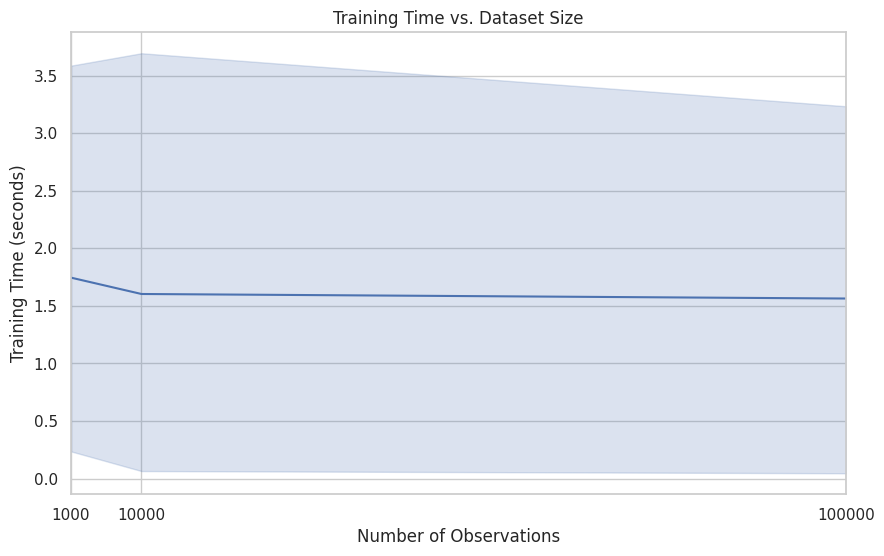

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
#creating both plots for  question 3.
#Set plot style
sns.set(style="whitegrid")

# Plot 1: Line plot of training time vs. # observations
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="No_of_Observations", y="time")
plt.title("Training Time vs. Dataset Size")
plt.ylabel("Training Time (seconds)")
plt.xlabel("Number of Observations")
plt.xlim(1000, 100000)
plt.xticks([1000, 10000, 100000])
plt.show()



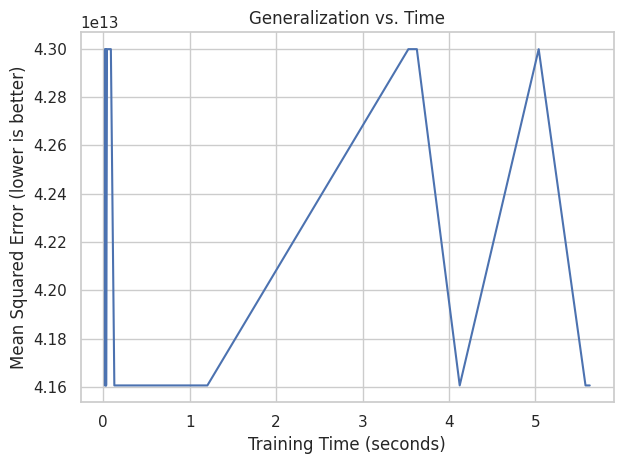

In [170]:

plt.figure()
sns.lineplot(data=results_df, x="time", y="Generalized_Set_20")

plt.title("Generalization vs. Time")
plt.xlabel("Training Time (seconds)")
plt.ylabel("Mean Squared Error (lower is better)")
plt.tight_layout()
plt.show()
